In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [18]:
cdf = pd.read_csv("gpt-4o-mini_data.csv")
mdf = pd.read_csv("mistral-small_data.csv")

pred_cols = ["my","else","nice","honest"]

cdf_error = pd.read_csv("gpt-4o-mini_data.csv")
mdf_error = pd.read_csv("mistral-small_data.csv")

cdf_error[pred_cols] = (cdf_error[pred_cols].T - cdf_error["score"]).T.abs()
mdf_error[pred_cols] = (mdf_error[pred_cols].T - cdf_error["score"]).T.abs()

In [19]:
cTbl = pd.DataFrame()
for prompt in ["my","else","nice","honest"]:
    cTbl.loc[prompt, "Grade mean"] = cdf[prompt].mean()
    cTbl.loc[prompt, "Grade std"] = cdf[prompt].std()
    cTbl.loc[prompt, "Error mean"] = cdf_error[prompt].mean()
    cTbl.loc[prompt, "Error std"] = cdf_error[prompt].std()
    cTbl.loc[prompt, "Sentiment mean"] = cdf[f"{prompt}_sen"].mean()
    cTbl.loc[prompt, "Sentiment std"] = cdf[f"{prompt}_sen"].std()    
cTbl

,Grade mean,Grade std,Error mean,Error std,Sentiment mean,Sentiment std
my,2.8785,0.621233,0.6330,0.620083,0.425340,0.558540
else,2.5685,0.691771,0.6740,0.662528,-0.120731,0.657180
nice,3.2265,0.540688,0.7040,0.636071,0.837446,0.226328
honest,2.6800,0.575122,0.6665,0.646906,0.280005,0.639588


In [20]:
mTbl = pd.DataFrame()
for prompt in ["my","else","nice","honest"]:
    mTbl.loc[prompt, "Grade mean"] = mdf[prompt].mean()
    mTbl.loc[prompt, "Grade std"] = mdf[prompt].std()
    mTbl.loc[prompt, "Error mean"] = mdf_error[prompt].mean()
    mTbl.loc[prompt, "Error std"] = mdf_error[prompt].std()
    mTbl.loc[prompt, "Sentiment mean"] = mdf[f"{prompt}_sen"].mean()
    mTbl.loc[prompt, "Sentiment std"] = mdf[f"{prompt}_sen"].std()    
mTbl

,Grade mean,Grade std,Error mean,Error std,Sentiment mean,Sentiment std
my,2.8740,0.531286,0.6435,0.631353,0.434513,0.555599
else,2.5575,0.556641,0.6650,0.662567,-0.223387,0.658426
nice,3.0805,0.533068,0.6400,0.618540,0.829719,0.282495
honest,2.5325,0.515826,0.7140,0.690972,0.192841,0.672816


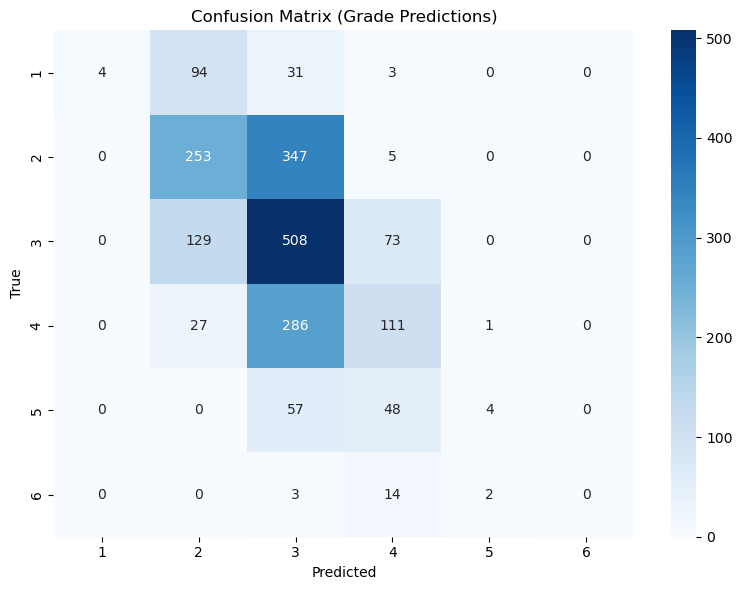

In [21]:
y_true = cdf["score"].astype(int)
y_pred = cdf["my"].astype(int) # We change this for different prompts and model (mdf) to get all confusion matrices


cm = confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5, 6])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=[1, 2, 3, 4, 5, 6],
            yticklabels=[1, 2, 3, 4, 5, 6])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Grade Predictions)")
plt.tight_layout()
plt.savefig("chat_my.pdf", format="pdf")
plt.show()


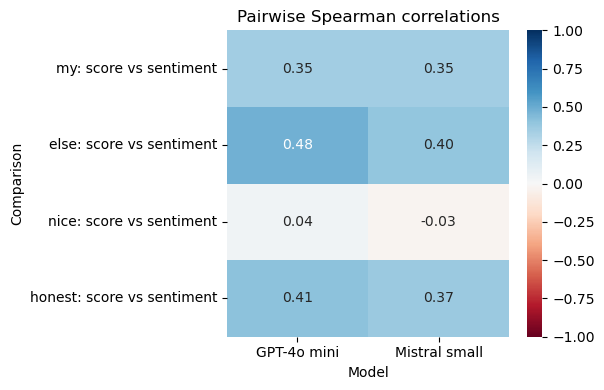

In [22]:
dfs = {"GPT-4o mini": cdf, "Mistral small": mdf}

pairs = [("my",     "my_sen"),
         ("else",   "else_sen"),
         ("nice",   "nice_sen"),
         ("honest", "honest_sen")]


corr = pd.DataFrame(index=[f"{l}: score vs sentiment" for l, r in pairs],
                    columns=dfs.keys(),
                    dtype=float)

for model, d in dfs.items():
    for left, right in pairs:
        corr.loc[f"{left}: score vs sentiment", model] = d[left].corr(d[right], method="spearman")


plt.figure(figsize=(6, 4))
sns.heatmap(corr.astype(float), vmin=-1, vmax=1, cmap="RdBu", annot=True, fmt=".2f")

plt.title("Pairwise Spearman correlations")
plt.xlabel("Model")
plt.ylabel("Comparison")
plt.tight_layout()
plt.savefig("Spearman.pdf", format="pdf")
plt.show()

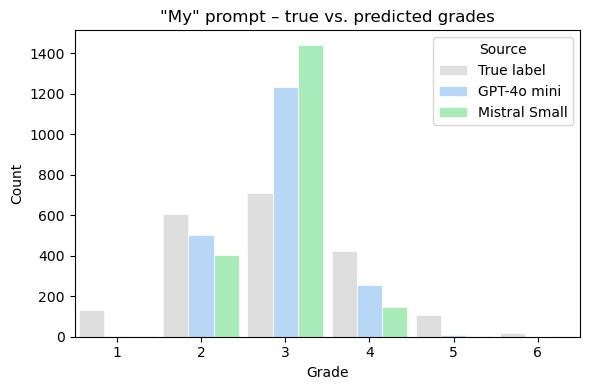

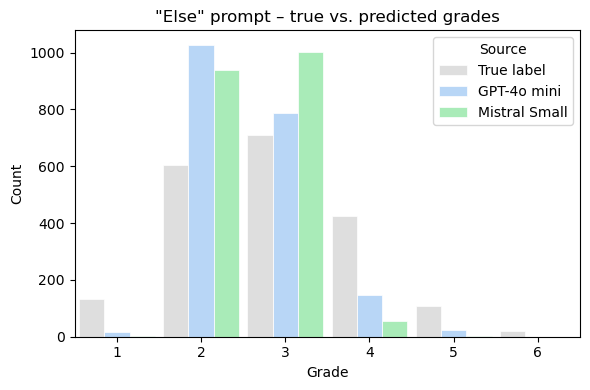

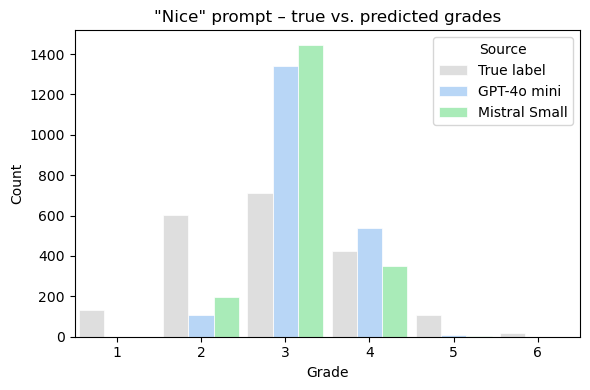

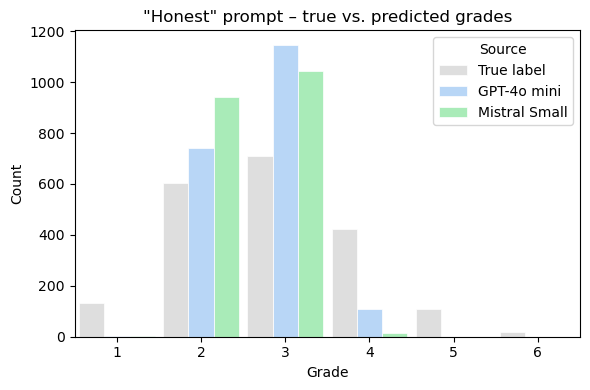

In [27]:
PROMPTS = ["my", "else", "nice", "honest"]    
TRUE     = cdf["score"]                        
BINS     = np.arange(0.5, 7.0, 1)              

palette = {
    "True label":    "lightgray",
    "GPT-4o mini":   sns.color_palette("pastel")[0],
    "Mistral Small": sns.color_palette("pastel")[2],
}

for col in PROMPTS:
    data = pd.concat([
        pd.DataFrame({"Grade": TRUE,      "Source": "True label"}),
        pd.DataFrame({"Grade": cdf[col],  "Source": "GPT-4o mini"}),
        pd.DataFrame({"Grade": mdf[col],  "Source": "Mistral Small"}),
    ])
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=data,
        x="Grade",
        hue="Source",
        palette=palette,
        bins=BINS,
        multiple="dodge",
        shrink=.9,
        edgecolor="white",
        linewidth=.5,
    )
    plt.xticks(range(1, 7))
    plt.xlim(0.5, 6.5)
    plt.xlabel("Grade")
    plt.ylabel("Count")
    plt.title(f"\"{col.capitalize()}\" prompt – true vs. predicted grades")
    plt.savefig(f"Bar plot - {col} prompt.pdf", format="pdf")
    plt.tight_layout()
    plt.show()